In [77]:
#Load Kiva dataset

In [78]:
import pandas as pd
import numpy as np

In [79]:
# Reading kiva loans file
kiva_loan = pd.read_csv("../input/kiva_loans.csv")
kiva_loan.head(n=3)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01


In [80]:
kiva_loan.shape[0]

671205

In [81]:
# Reading Kiva Region Location file.
kiva_region_location = pd.read_csv("../input/kiva_mpi_region_locations.csv")
kiva_region_location.head(n=5)

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


In [82]:
# Reading Kiva Loan theme File
kiva_loan_theme = pd.read_csv("../input/loan_theme_ids.csv")
kiva_loan_theme.head(n=3)

,id,Loan Theme ID,Loan Theme Type,Partner ID
0,638631,a1050000000skGl,General,151.0
1,640322,a1050000000skGl,General,151.0
2,641006,a1050000002X1ij,Higher Education,160.0


In [83]:
# Reading Kiva Loan Themes by Region File
kiva_loan_themes_by_region = pd.read_csv("../input/loan_themes_by_region.csv")
kiva_loan_themes_by_region.head(n=3)

,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,...,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
0,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Banteay Meanchey,"(13.75, 103.0)",KHM,...,450,"Banteay Meanchey, Cambodia","[(13.6672596, 102.8975098)]",Banteay Meanchey Province; Cambodia,"(13.6672596, 102.8975098)",13.667260,102.897510,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
1,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Battambang Province,NaN,KHM,...,20275,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
2,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Battambang Province,NaN,KHM,...,9150,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0


In [84]:
import plotly
import plotly.plotly as py
#import plotly.figure_factory as ff
from plotly.tools import FigureFactory as ff
#plotly.tools.set_credentials_file(username='abhay.rnj', api_key='8MzosR0uht5BE3tfUlhd')
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
#from plotly.graph_objs import Scatter,Figure,Layout
from plotly.graph_objs import *
init_notebook_mode(connected=True)

In [85]:
loan_count_by_country_df = pd.DataFrame(kiva_loan['country'].value_counts()).head(n=25).reset_index()
loan_count_by_country_df.columns = ['Country','number_of_loans']
loan_count_by_country_df.head(n=2)

,Country,number_of_loans
0,Philippines,160441
1,Kenya,75825


In [86]:
import plotly.offline as offline
#scl = [[0.0,'rgb(242,240,248)'],[0.20,'rgb(215,220,225)'],[0.40,'rgb(190,195,198)'],[0.60,'rgb(160,170,180)'],[0.80,'rgb(140,144,150)'],[1.0,'rgb(110,114,120)']]
colorscale = [[0,"rgb(5, 10, 172)"],[0.85,"rgb(40, 60, 190)"],[0.9,"rgb(70, 100, 245)"],\
            [0.94,"rgb(90, 120, 245)"],[0.97,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
loan_data = [ dict(
        type='choropleth',
        colorscale = colorscale,
        autocolorscale = False,
        reversescale = True,
        locations = loan_count_by_country_df['Country'],
        z = loan_count_by_country_df['number_of_loans'].astype(float),
        locationmode = 'USA-states',
        text = loan_count_by_country_df['Country'],
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 2
            )
        ),
        colorbar = dict(
            tickprefix = '',
            title = "Number Of Loans"
        )
    ) ]

loan_layout = dict(
    title = 'Loans Instances by Country',
    geo = dict(
        showframe = False,
        showcoastlines = True,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict(data=loan_data,layout=loan_layout)
#py.iplot(fig,validate=False,filename='choropleth-map')
iplot(fig,validate=False,filename='choropleth-map')
#fig = ff.dict(data=loan_data,layout=loan_layout)
#fig = offline.plot({'data':loan_data,'layout':loan_layout},image='png')
#py.iplot(fig)

In [87]:
#Heatmap for number of loans by country

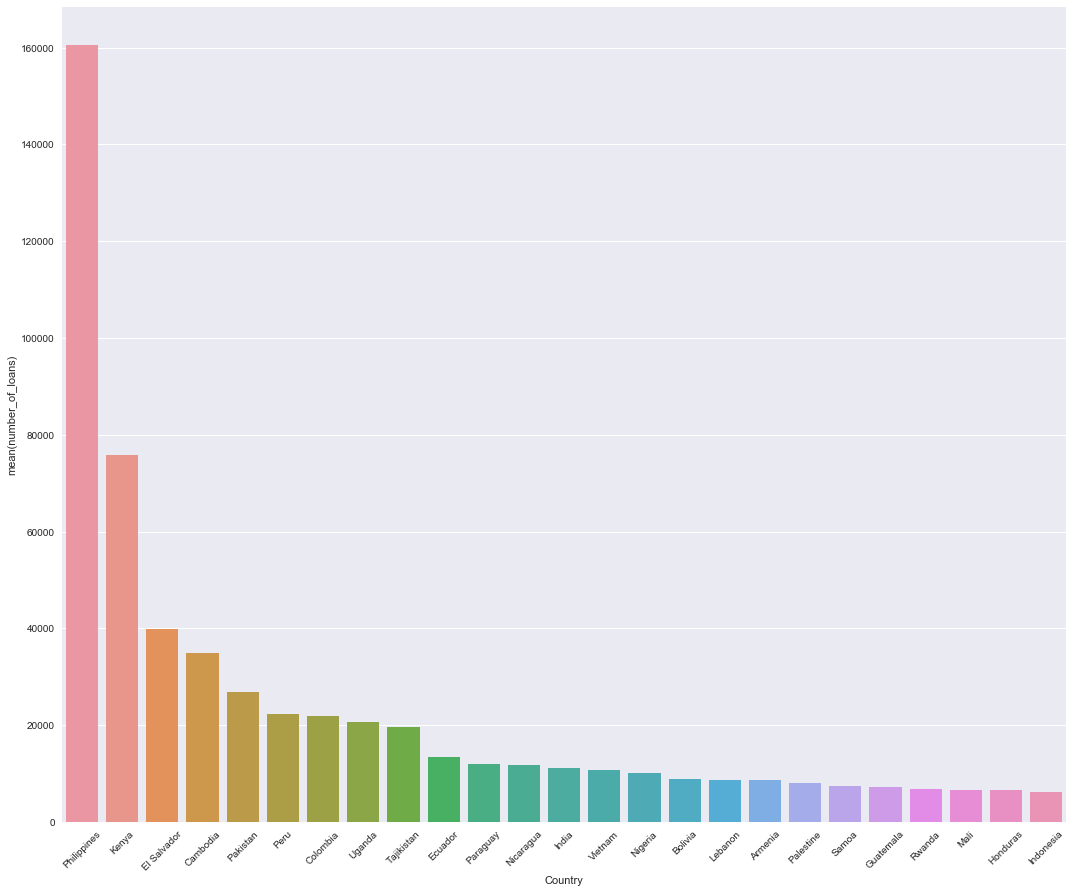

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams


%matplotlib inline
rcParams['figure.figsize'] = 15,10
x = loan_count_by_country_df['Country']
y = loan_count_by_country_df['number_of_loans']
figure_size = (18,15)
figure, ax = plt.subplots(figsize=figure_size)
ax = sns.barplot(x='Country', y ='number_of_loans',data=loan_count_by_country_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

In [89]:
import plotly.graph_objs as go
init_notebook_mode(connected=True)
#loan_count_by_country_df
trace = go.Pie(labels=loan_count_by_country_df.Country,values=loan_count_by_country_df.number_of_loans)
layout = dict(
    title='Loans Distribution by Country',
)
#fig = go.
fig = go.Figure(data=[trace],layout=layout)
#py.iplot([trace],filename='Loan Count By Country')
iplot(fig,filename='Loan Distribution')

# Post Execution Notes: The pie chart below shows that from countries like Philipines,Kenya,El Salvador,Cambodia highest number of loans are being taken.

In [90]:
# Number of Loans by Sector

In [91]:

import plotly.graph_objs as go
import plotly.plotly as py

kiva_loans_count_by_sector = kiva_loan['sector'].value_counts().reset_index()
kiva_loans_count_by_sector.columns = ['Sector','NumberOfLoans']
kiva_loans_count_by_sector.head(n=5)
trace = go.Pie(labels=kiva_loans_count_by_sector.Sector,values=kiva_loans_count_by_sector.NumberOfLoans)
layout = dict(
    title='Loan Distribution By Sector',
)
fig = go.Figure(data=[trace],layout=layout)
iplot(fig,filename='Loan Distribtuion BySector')

In [92]:
# Average Dollar Value of Loan per Country

In [93]:
average_loan_value_by_country_df = pd.DataFrame(kiva_loan.groupby(['country'])['loan_amount'].mean()).head(n=25).reset_index()
average_loan_value_by_country_df.columns = ['Country','AverageLoanAmount']
average_loan_value_by_country_df = average_loan_value_by_country_df.sort_values(by=['AverageLoanAmount'],ascending=False)
average_loan_value_by_country_df.head(n=5)

,Country,AverageLoanAmount
18,Cote D'Ivoire,50000.000000
13,Chile,12265.000000
6,Bhutan,10000.000000
0,Afghanistan,7000.000000
16,Congo,6142.578125


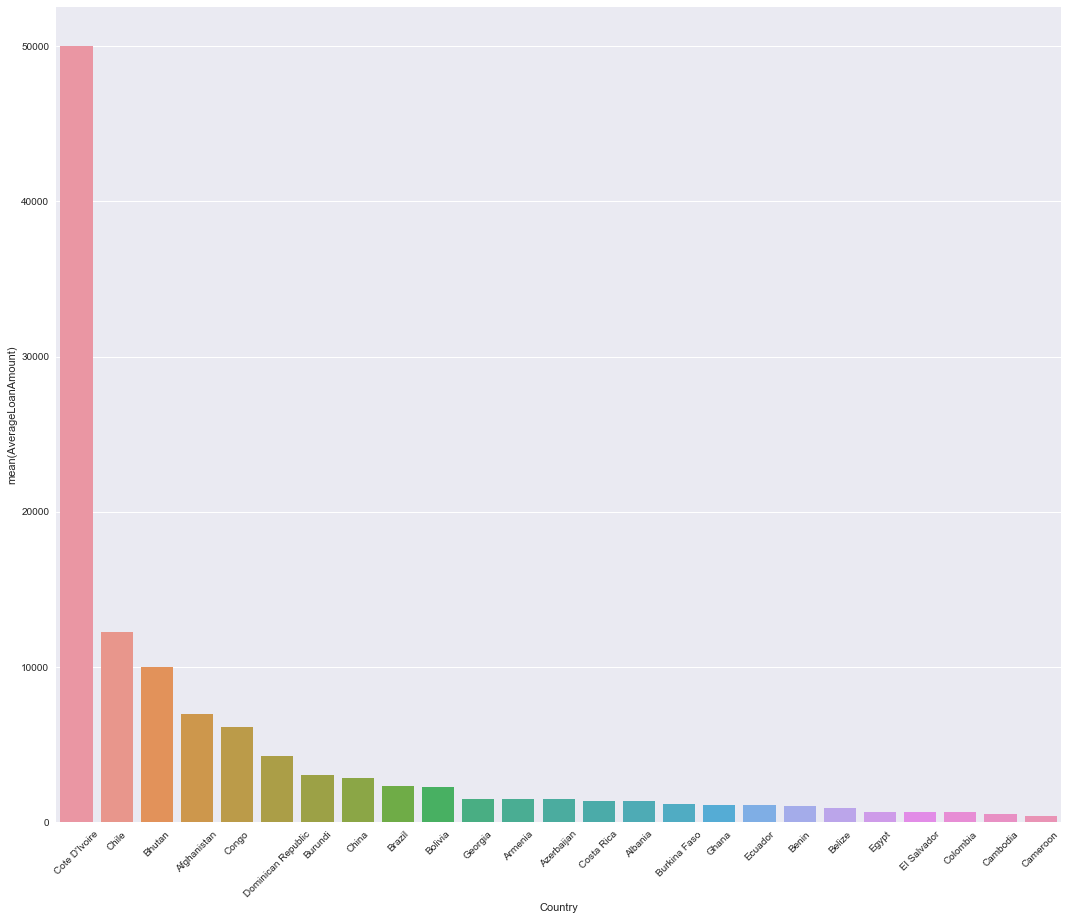

In [94]:
rcParams['figure.figsize'] = 15,10
x = average_loan_value_by_country_df['Country']
y = average_loan_value_by_country_df['AverageLoanAmount']
figure_size = (18,15)
figure, ax = plt.subplots(figsize=figure_size)
ax = sns.barplot(x='Country', y ='AverageLoanAmount',data=average_loan_value_by_country_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

In [95]:
# Total Loan Dollar Value Per Country
total_loan_value_by_country_df = pd.DataFrame(kiva_loan.groupby(['country'])['loan_amount'].sum()).head(n=25).reset_index()
total_loan_value_by_country_df.columns = ['Country','TotalLoanAmount']
total_loan_value_by_country_df = total_loan_value_by_country_df.sort_values(by=['TotalLoanAmount'],ascending=False)
total_loan_value_by_country_df.head(n=5)

,Country,TotalLoanAmount
22,El Salvador,26603650.0
11,Cambodia,19872700.0
7,Bolivia,19843250.0
20,Ecuador,15000275.0
15,Colombia,14415600.0


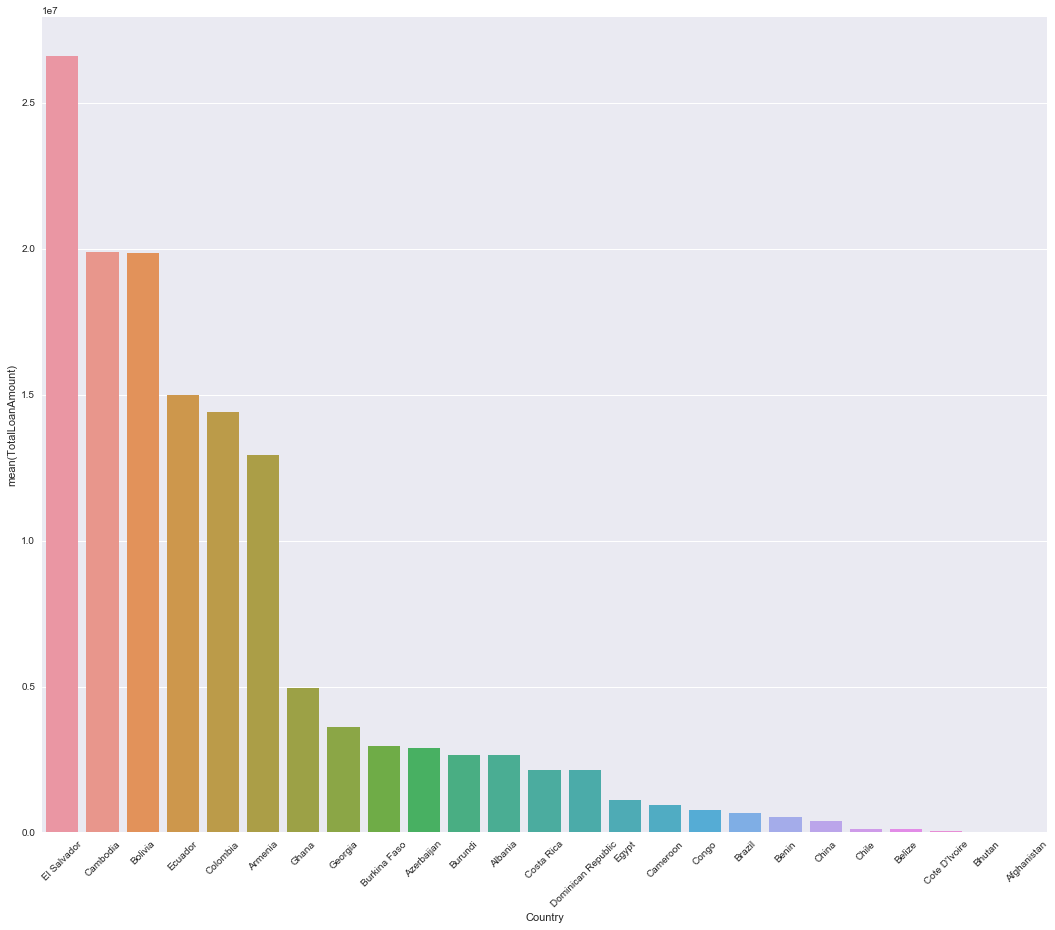

In [96]:
rcParams['figure.figsize'] = 15,10
x = total_loan_value_by_country_df['Country']
y = total_loan_value_by_country_df['TotalLoanAmount']
figure_size = (18,15)
figure, ax = plt.subplots(figsize=figure_size)
ax = sns.barplot(x='Country', y ='TotalLoanAmount',data=total_loan_value_by_country_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)